In [72]:
import pandas as pd
import pyfolio as pf
from joblib import load
from matplotlib import pyplot as plt
import numpy as np

In [2]:
import zipline
%load_ext zipline

In this section, we shall go about building a **scalping strategy**, first with Pandas.<br> 
There are two common strategies in finance: <i>momentum strategy</i>, usually referred to as trend trading and, the opposite, <i>reversion strategy</i>, frequently known as convergence or cycle trading.<br> 
More concretely, we will perform a <i>moving average crossover</i>, which is when the price of an asset moves from one side of a moving average to the other. This crossover represents a change in momentum and can be used as a point of making the decision to enter or exit the market. 

### Dual Moving Average

In [62]:
%%zipline --start 2015-5-13 --end 2018-3-15 --capital-base 10000.0 -o ../strategies/models/dma_strategy.joblib --no-benchmark -b quandl

from zipline.api import order, record, symbol

# parameters 
stock = 'AAPL'
slow_ma_periods = 32
fast_ma_periods = 8

def initialize(context):
    context.time = 0
    context.asset = symbol(stock)
    context.has_position = False
    
def handle_data(context, data):
    context.time += 1
    if context.time < slow_ma_periods:
        return

    fast_ma = data.history(context.asset, 'price', bar_count=fast_ma_periods, frequency="1d").mean()
    slow_ma = data.history(context.asset, 'price', bar_count=slow_ma_periods, frequency="1d").mean()

    # Trading logic
    if (fast_ma > slow_ma) & (not context.has_position):
        order(context.asset, 100)
        context.has_position = True
    elif (fast_ma < slow_ma) & (context.has_position):
        order(context.asset, -100)
        context.has_position = False

    record(price=data.current(context.asset, 'price'),
           fast_ma=fast_ma,
           slow_ma=slow_ma)

,algo_volatility,algorithm_period_return,alpha,benchmark_period_return,benchmark_volatility,beta,capital_used,ending_cash,ending_exposure,ending_value,...,short_value,shorts_count,slow_ma,sortino,starting_cash,starting_exposure,starting_value,trading_days,transactions,treasury_period_return
2015-05-13 20:00:00+00:00,NaN,0.000000,None,0.0,NaN,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,1,[],0.0
2015-05-14 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,2,[],0.0
2015-05-15 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,3,[],0.0
2015-05-18 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,4,[],0.0
2015-05-19 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,5,[],0.0
2015-05-20 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,6,[],0.0
2015-05-21 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,7,[],0.0
2015-05-22 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,8,[],0.0
2015-05-26 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,9,[],0.0
2015-05-27 20:00:00+00:00,0.000000,0.000000,None,0.0,0.0,None,0.0000,10000.0000,0.0,0.0,...,0.0,0,NaN,NaN,10000.0000,0.0,0.0,10,[],0.0


In [63]:
df_dma = load('../strategies/models/dma_strategy.joblib')

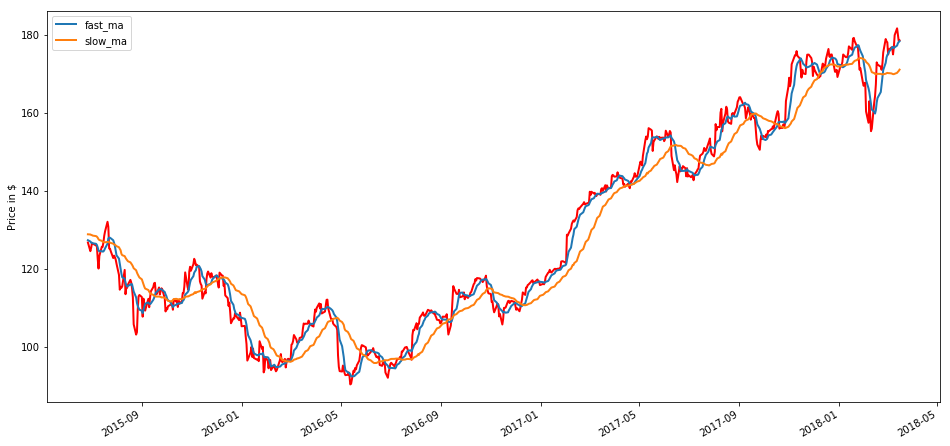

In [66]:
# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 2
ax1 = fig.add_subplot(111, ylabel='Price in $')

# Plot the price and two moving averages
df_dma['price'].plot(ax=ax1, color='r', lw=2.)
df_dma[['fast_ma', 'slow_ma']].plot(ax=ax1, lw=2.)

# Plot the buy and sell signals
ax1.plot(df_dma.loc[df_dma.positions == 1.0].index, 
         df_dma['fast_ma'][df_dma['positions'] == 1.0],
         '^', markersize=10, color='m')
ax1.plot(df_dma.loc[df_dma.positions == -1.0].index, 
         df_dma['fast_ma'][df_dma['positions'] == -1.0],
         'v', markersize=10, color='k')

plt.show()

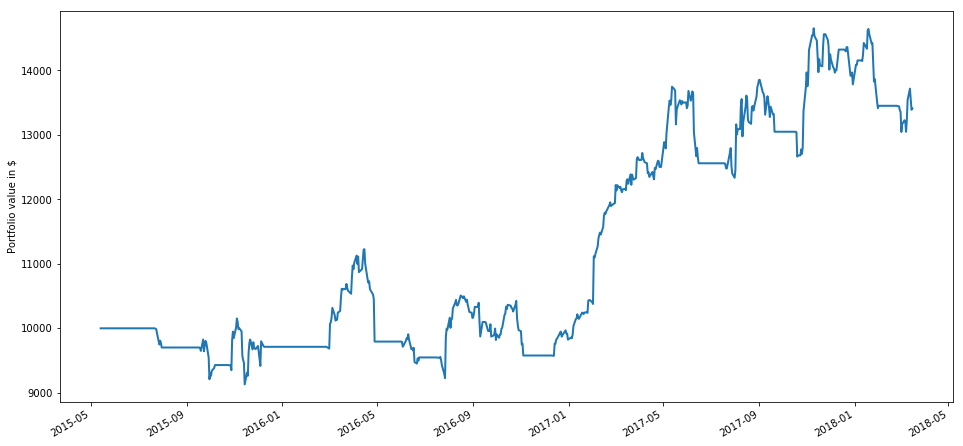

In [67]:
# Import `pyplot` module as `plt`
import matplotlib.pyplot as plt

# Initialize the plot figure
fig = plt.figure(figsize=(16, 8))      

# Subplot for axes 1
ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
df_dma['portfolio_value'].plot(ax=ax1, lw=2.)

ax1.plot(df_dma.loc[df_dma.positions == 1.0].index, 
         df_dma['portfolio_value'][df_dma.positions == 1.0],
         '^', markersize=10, color='m')
ax1.plot(df_dma.loc[df_dma.positions == -1.0].index, 
         df_dma['portfolio_value'][df_dma.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

In [64]:
df_dma.portfolio_value[-1]

13410.340499999995

In [65]:
df_dma.capital_used.sum()

-14454.659499999998

### Pyfolio for backtesting

In [68]:
returns, positions, transactions = pf.utils.extract_rets_pos_txn_from_zipline(df_dma)

Start date,2015-05-13
End date,2018-03-15
Total months,34
,Backtest
Annual return,10.9%
Cumulative returns,34.1%
Annual volatility,17.0%
Sharpe ratio,0.69
Calmar ratio,0.61
Stability,0.75
Max drawdown,-17.8%


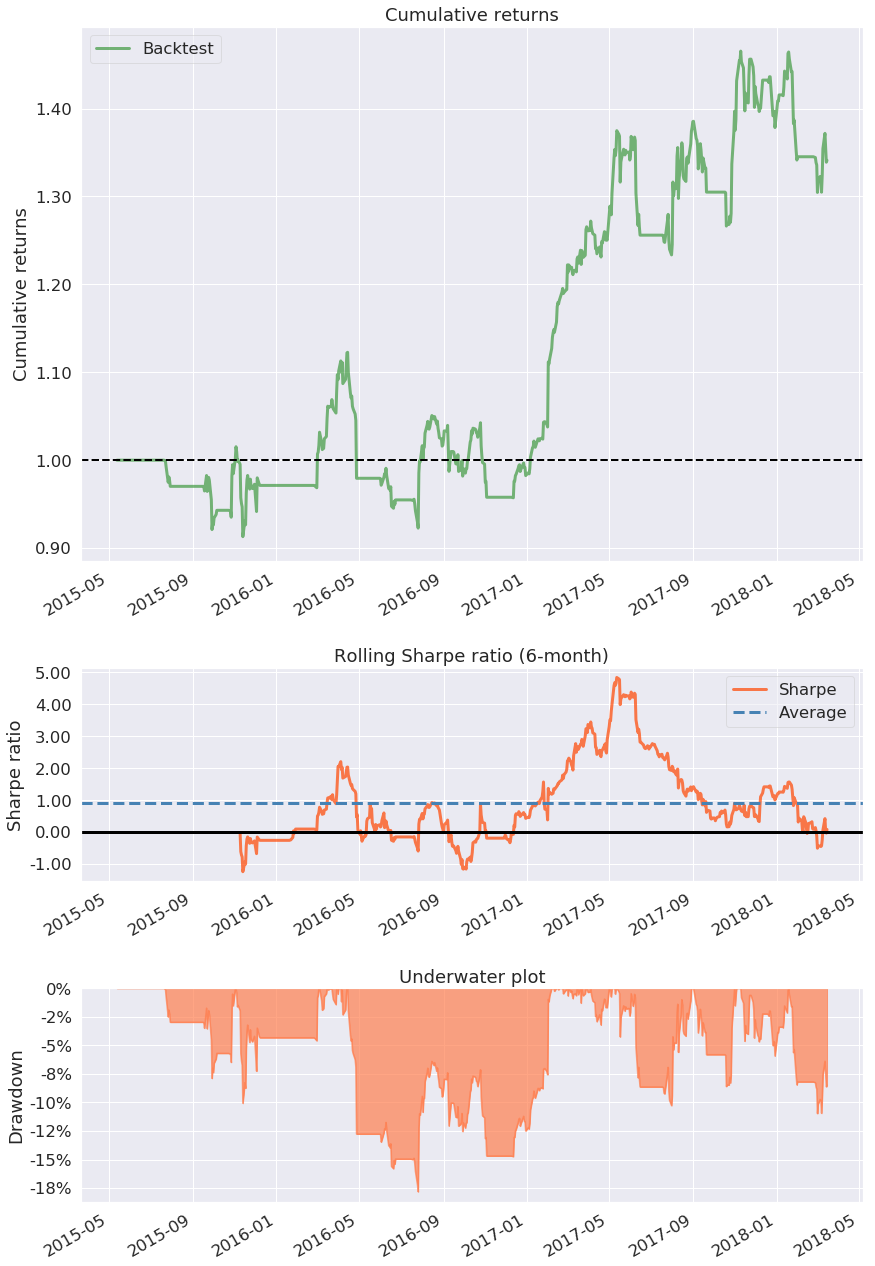

In [69]:
pf.create_simple_tear_sheet(returns)

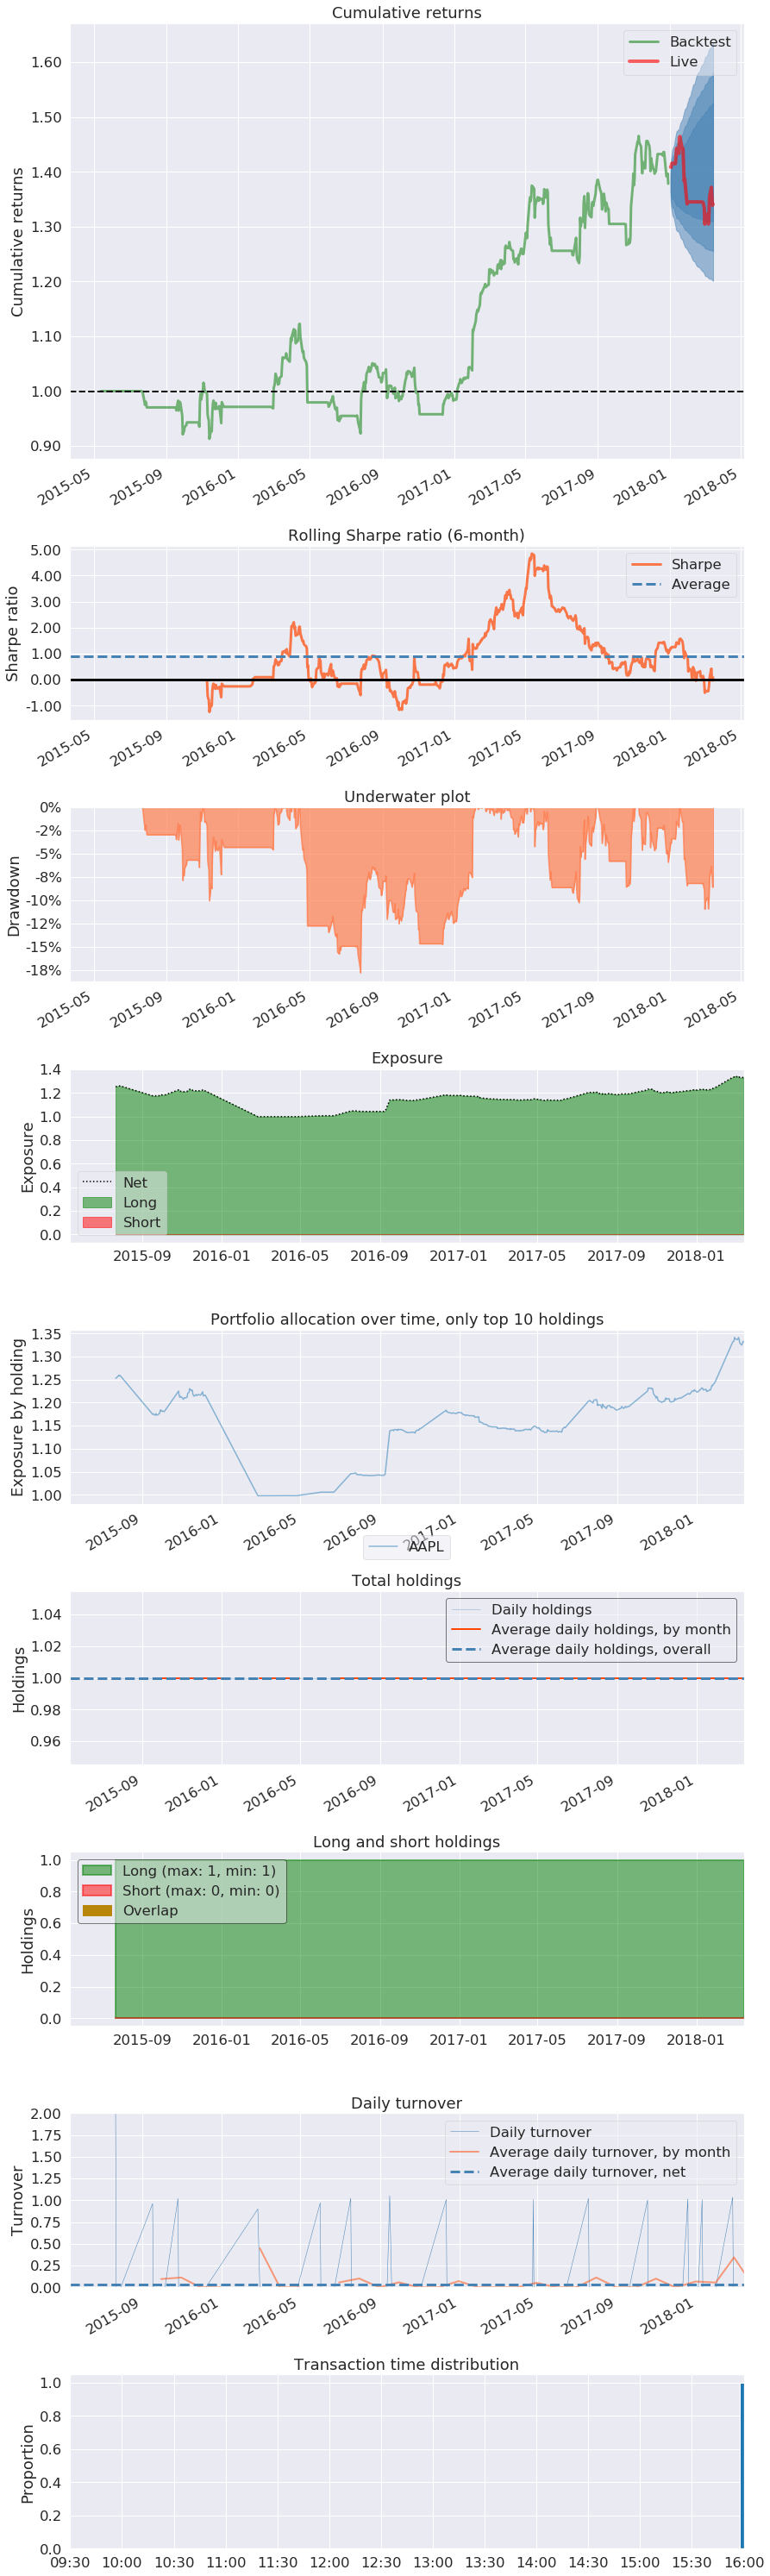

In [70]:
pf.create_simple_tear_sheet(returns, positions, transactions, live_start_date='2018-01-01')

Start date,2015-05-13
End date,2018-03-15
Total months,34
,Backtest
Annual return,10.9%
Cumulative returns,34.1%
Annual volatility,17.0%
Sharpe ratio,0.69
Calmar ratio,0.61
Stability,0.75
Max drawdown,-17.8%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,17.81,2016-04-14,2016-07-26,2017-02-06,213
1,10.97,2017-11-09,2018-03-01,NaT,NaN
2,10.28,2017-05-12,2017-07-31,2017-08-30,79
3,10.08,2015-11-03,2015-11-13,2016-03-03,88
4,8.60,2017-09-01,2017-10-19,2017-10-31,43


Stress Events,mean,min,max
Fall2015,-0.13%,-3.54%,1.82%
New Normal,0.05%,-6.30%,7.13%


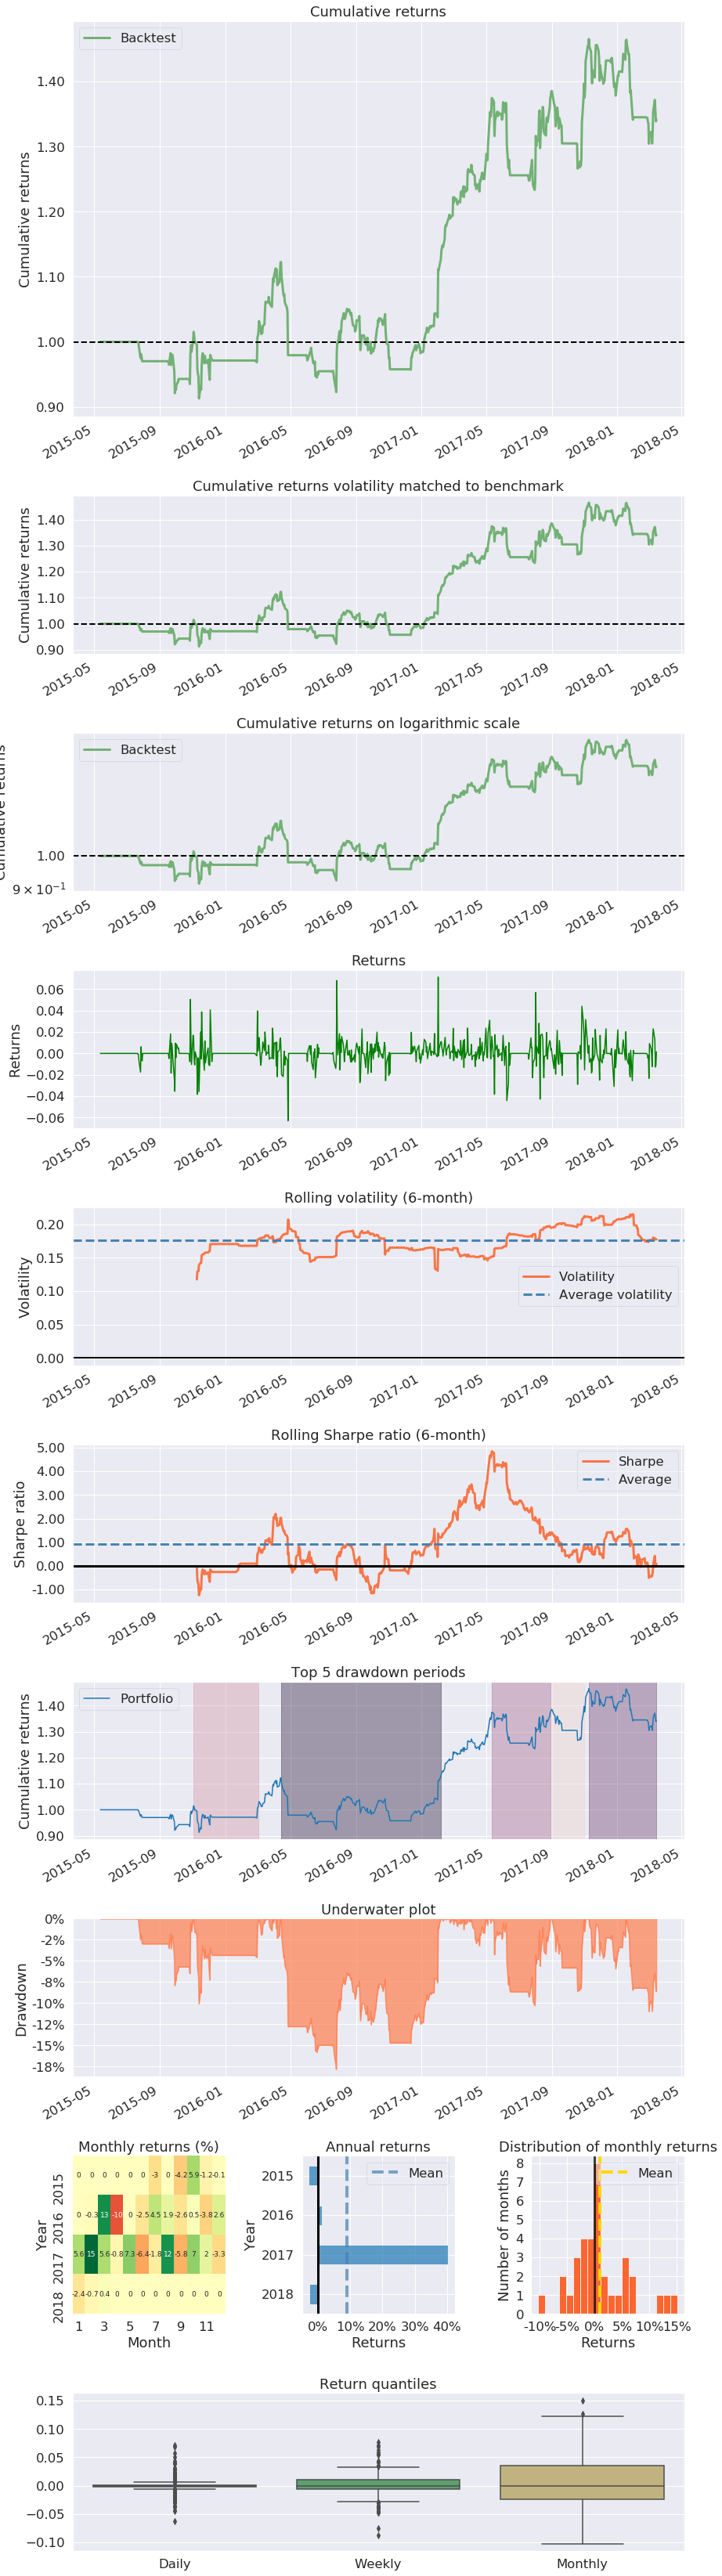

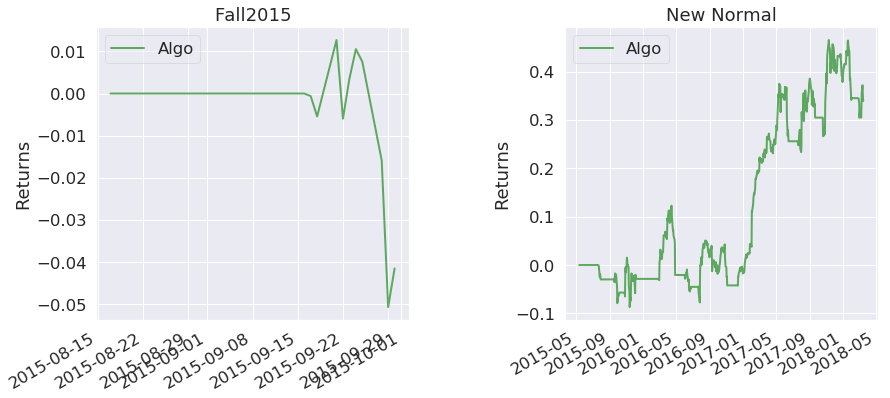

In [71]:
pf.create_full_tear_sheet(returns)